![](2024-spotify-brand-assets-media-kit.jpg)

In [1134]:
import pandas as pd
import numpy as np
import re
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns

In [1135]:
try:
    os.mkdir("figures")
except FileExistsError:
    pass

To evade "UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7250-7251: invalid continuation byte" error, pass `latin1` as encoding format for `encoding` parameter

In [1136]:
df = pd.read_csv(
    filepath_or_buffer="spotify-2023.csv",
    encoding="latin1"
)

#### Information on Features

- `track_name`: Name of the song
- `artist(s)_name`: Name of the artist(s) of the song
- `artist_count`: Number of artists contributing to the song
- `released_year`: Year when the song was released
- `released_month`: Month when the song was released
- `released_day`: Day of the month when the song was released
in_spotify_playlists: Number of Spotify playlists the song is included in
in_spotify_charts: Presence and rank of the song on Spotify charts
streams: Total number of streams on Spotify
in_apple_playlists: Number of Apple Music playlists the song is included in
in_apple_charts: Presence and rank of the song on Apple Music charts
in_deezer_playlists: Number of Deezer playlists the song is included in
in_deezer_charts: Presence and rank of the song on Deezer charts
in_shazam_charts: Presence and rank of the song on Shazam charts
bpm: Beats per minute, a measure of song tempo
key: Key of the song
mode: Mode of the song (major or minor)
danceability_%: Percentage indicating how suitable the song is for dancing
valence_%: Positivity of the song's musical content
energy_%: Perceived energy level of the song
- `acousticness_%`: Amount of acoustic sound in the song
- `instrumentalness_%`: Amount of instrumental content in the song
- `liveness_%`: Presence of live performance elements
- `speechiness_%`: Amount of spoken words in the song



In [1137]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### 🧹 SECTION 1 — Data Cleaning & Type Fixes

#### Duplicate & Consistency Check

In [1138]:
df = df.drop_duplicates(
    subset=["track_name"]
)

In [1139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            943 non-null    object
 1   artist(s)_name        943 non-null    object
 2   artist_count          943 non-null    int64 
 3   released_year         943 non-null    int64 
 4   released_month        943 non-null    int64 
 5   released_day          943 non-null    int64 
 6   in_spotify_playlists  943 non-null    int64 
 7   in_spotify_charts     943 non-null    int64 
 8   streams               943 non-null    object
 9   in_apple_playlists    943 non-null    int64 
 10  in_apple_charts       943 non-null    int64 
 11  in_deezer_playlists   943 non-null    object
 12  in_deezer_charts      943 non-null    int64 
 13  in_shazam_charts      893 non-null    object
 14  bpm                   943 non-null    int64 
 15  key                   851 non-null    object


#### Missing Values Strategy

In [1140]:
for column in df.columns:
    print(
        f"Number of missing values for {column} is {df[column].isna().sum()}"
    )

Number of missing values for track_name is 0
Number of missing values for artist(s)_name is 0
Number of missing values for artist_count is 0
Number of missing values for released_year is 0
Number of missing values for released_month is 0
Number of missing values for released_day is 0
Number of missing values for in_spotify_playlists is 0
Number of missing values for in_spotify_charts is 0
Number of missing values for streams is 0
Number of missing values for in_apple_playlists is 0
Number of missing values for in_apple_charts is 0
Number of missing values for in_deezer_playlists is 0
Number of missing values for in_deezer_charts is 0
Number of missing values for in_shazam_charts is 50
Number of missing values for bpm is 0
Number of missing values for key is 92
Number of missing values for mode is 0
Number of missing values for danceability_% is 0
Number of missing values for valence_% is 0
Number of missing values for energy_% is 0
Number of missing values for acousticness_% is 0
Numbe

In [1141]:
# NOTE: I am not going to use it.
df = df.drop(labels="key", axis="columns")

#### Audit Data Types & Fixing Numeric Columns

In [1142]:
for column in df.columns:
    print(f"{column}: {df.loc[0, column]} - {df[column].dtype}")

track_name: Seven (feat. Latto) (Explicit Ver.) - object
artist(s)_name: Latto, Jung Kook - object
artist_count: 2 - int64
released_year: 2023 - int64
released_month: 7 - int64
released_day: 14 - int64
in_spotify_playlists: 553 - int64
in_spotify_charts: 147 - int64
streams: 141381703 - object
in_apple_playlists: 43 - int64
in_apple_charts: 263 - int64
in_deezer_playlists: 45 - object
in_deezer_charts: 10 - int64
in_shazam_charts: 826 - object
bpm: 125 - int64
mode: Major - object
danceability_%: 80 - int64
valence_%: 89 - int64
energy_%: 83 - int64
acousticness_%: 31 - int64
instrumentalness_%: 0 - int64
liveness_%: 8 - int64
speechiness_%: 4 - int64


`streams`, `in_deezer_playlists` and `in_shazam_charts` obviously are not `object`s. I gotta fix their types

In [1143]:
mask = (df["streams"] == "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3")
df = df.loc[~mask]

In [1144]:
# NOTE: 0 Does not mean that it was streamed 0 times
#       It means that the actual number of streams is unknown.


columns_to_fix = ["streams", "in_deezer_playlists", "in_shazam_charts"]

for column in columns_to_fix:
    df[column] = (
        df[column]
        .astype(str)
        .str.replace(",", "", regex=False)
    )
    df[column] = pd.to_numeric(df[column], errors="coerce") 
    df[column] = df[column].fillna(0).astype("int64") 

In [1145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            942 non-null    object
 1   artist(s)_name        942 non-null    object
 2   artist_count          942 non-null    int64 
 3   released_year         942 non-null    int64 
 4   released_month        942 non-null    int64 
 5   released_day          942 non-null    int64 
 6   in_spotify_playlists  942 non-null    int64 
 7   in_spotify_charts     942 non-null    int64 
 8   streams               942 non-null    int64 
 9   in_apple_playlists    942 non-null    int64 
 10  in_apple_charts       942 non-null    int64 
 11  in_deezer_playlists   942 non-null    int64 
 12  in_deezer_charts      942 non-null    int64 
 13  in_shazam_charts      942 non-null    int64 
 14  bpm                   942 non-null    int64 
 15  mode                  942 non-null    object


### 🎵 SECTION 2 — Popularity & Streaming Analysis

#### Platform Presence vs Streams

In [1146]:
numeric_df = df.select_dtypes(include="number")

In [1147]:
cm = numeric_df.corr(method="pearson")

In [1148]:
cm

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.090497,0.039125,-0.017119,-0.104139,-0.021657,-0.137853,-0.051963,-0.093468,-0.073016,-0.001850,-0.012828,-0.035415,0.207160,0.127229,0.136985,-0.103421,-0.048902,0.044132,0.120720
released_year,0.090497,1.000000,0.062153,0.166312,-0.405122,0.064829,-0.239596,-0.205626,-0.036689,-0.319976,0.092007,0.021135,-0.001616,0.186679,-0.051373,0.086679,-0.118921,-0.018945,0.000799,0.131892
released_month,0.039125,0.062153,1.000000,0.077926,-0.103533,-0.048755,-0.023389,0.001237,-0.018901,-0.088309,-0.007842,-0.088064,-0.040911,-0.047567,-0.113166,-0.085142,0.056116,0.028950,-0.008244,0.037459
released_day,-0.017119,0.166312,0.077926,1.000000,-0.078688,0.020505,0.010323,0.029847,0.014637,-0.085091,0.076367,0.016133,-0.033598,0.047043,0.044377,0.049691,-0.001659,0.016128,0.002821,-0.015986
in_spotify_playlists,-0.104139,-0.405122,-0.103533,-0.078688,1.000000,0.163665,0.790159,0.709069,0.269258,0.826680,0.144420,0.058154,-0.017038,-0.108161,-0.024547,0.033346,-0.065655,-0.026421,-0.047868,-0.089404
in_spotify_charts,-0.021657,0.064829,-0.048755,0.020505,0.163665,1.000000,0.245031,0.235594,0.552914,0.087005,0.607577,0.571454,0.038888,0.030281,0.036430,0.079979,-0.054746,-0.008903,-0.046049,-0.083581
streams,-0.137853,-0.239596,-0.023389,0.010323,0.790159,0.245031,1.000000,0.775079,0.320353,0.598126,0.229720,-0.007973,-0.000569,-0.105869,-0.042860,-0.028212,-0.002878,-0.043806,-0.050191,-0.112340
in_apple_playlists,-0.051963,-0.205626,0.001237,0.029847,0.709069,0.235594,0.775079,1.000000,0.413421,0.473686,0.367759,0.102715,0.027781,-0.030572,0.054774,0.050625,-0.061459,-0.054995,-0.051222,-0.107743
in_apple_charts,-0.093468,-0.036689,-0.018901,0.014637,0.269258,0.552914,0.320353,0.413421,1.000000,0.172576,0.387167,0.405192,0.035504,-0.027417,0.045953,0.104645,-0.079623,-0.011236,-0.018620,-0.151929
in_deezer_playlists,-0.073016,-0.319976,-0.088309,-0.085091,0.826680,0.087005,0.598126,0.473686,0.172576,1.000000,0.067366,0.065912,-0.033797,-0.072002,-0.014255,0.064330,-0.063725,-0.016172,-0.026535,-0.062793


In [1149]:
columns_to_choose = [
    "in_spotify_playlists",
    "in_apple_playlists",
    "in_deezer_playlists"
]
relationship = cm.loc[columns_to_choose, "streams"]

In [1150]:
relationship

in_spotify_playlists    0.790159
in_apple_playlists      0.775079
in_deezer_playlists     0.598126
Name: streams, dtype: float64

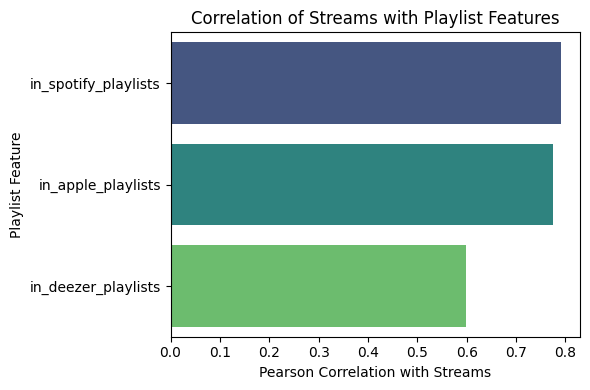

In [1151]:
title = "Correlation of Streams with Playlist Features"

plt.figure(figsize=(6, 4))
sns.barplot(
    x=relationship.values,
    y=relationship.index,
    palette="viridis",
    hue=relationship.index
)
plt.xlabel("Pearson Correlation with Streams")
plt.ylabel("Playlist Feature")
plt.title(title)
plt.tight_layout()

filename = re.sub(r'\W+', '_', title.lower()) + ".png"
plt.savefig(f"figures/{filename}", dpi=300, bbox_inches="tight")

plt.show()


### Charts Appearance Impact

In [1152]:
df["in_apple_charts"]

0      263
1      126
2      207
3      207
4      133
      ... 
948     13
949      0
950      0
951     26
952     18
Name: in_apple_charts, Length: 942, dtype: int64

In [1153]:
new_table = pd.DataFrame({
    "platform": ["apple", "spotify", "deezer", "shazam"],
    "number": [
        df["in_apple_charts"].sum(),
        df["in_spotify_charts"].sum(),
        df["in_deezer_charts"].sum(),
        df["in_shazam_charts"].sum()
    ]
}).sort_values(by="number", ascending=False)


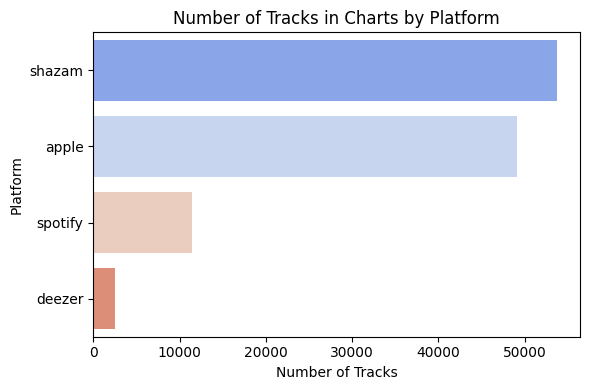

In [1154]:
title = "Number of Tracks in Charts by Platform"

plt.figure(figsize=(6, 4))

sns.barplot(
    x="number",
    y="platform",
    data=new_table,
    palette="coolwarm",
    hue="platform"
)

plt.xlabel("Number of Tracks")
plt.ylabel("Platform")
plt.title(title)
plt.tight_layout()

filename = re.sub(r'\W+', '_', title.lower()) + ".png"
plt.savefig(f"figures/{filename}", dpi=300, bbox_inches="tight")

plt.show()

#### Artist Count Effect

In [1155]:
stats = (
    df
    .groupby("artist_count")
    .agg(mean_stream=("streams", "mean"))
)

stats["mean_stream"] = np.round(stats["mean_stream"], 2)
stats = stats.reset_index()
stats["artist_count"] = stats["artist_count"].astype(str)

In [1156]:
stats

,artist_count,mean_stream
0,1,5.708059e+08
1,2,4.631014e+08
2,3,3.813421e+08
3,4,3.061062e+08
4,5,1.448082e+08
5,6,8.746645e+07
6,7,3.390601e+08
7,8,1.732212e+08


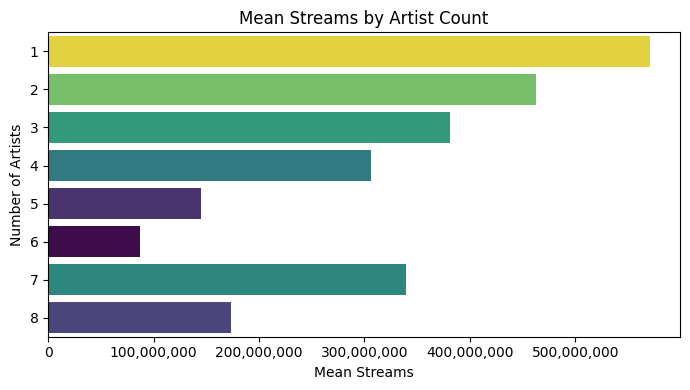

In [1157]:
title = "Mean Streams by Artist Count"

plt.figure(figsize=(7, 4))

sns.barplot(
    x="mean_stream",
    y="artist_count",
    data=stats,
    palette="viridis",
    hue="mean_stream",
    legend=None
)

plt.xlabel("Mean Streams")
plt.ylabel("Number of Artists")
plt.title(title)

plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

plt.tight_layout()

filename = os.path.join(
    "figures",
    re.sub(r'\W+', '_', title.lower()) + ".png"
)
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

### 🎼 SECTION 3 — Musical Characteristics & Audio Features

#### Audio Feature Distributions

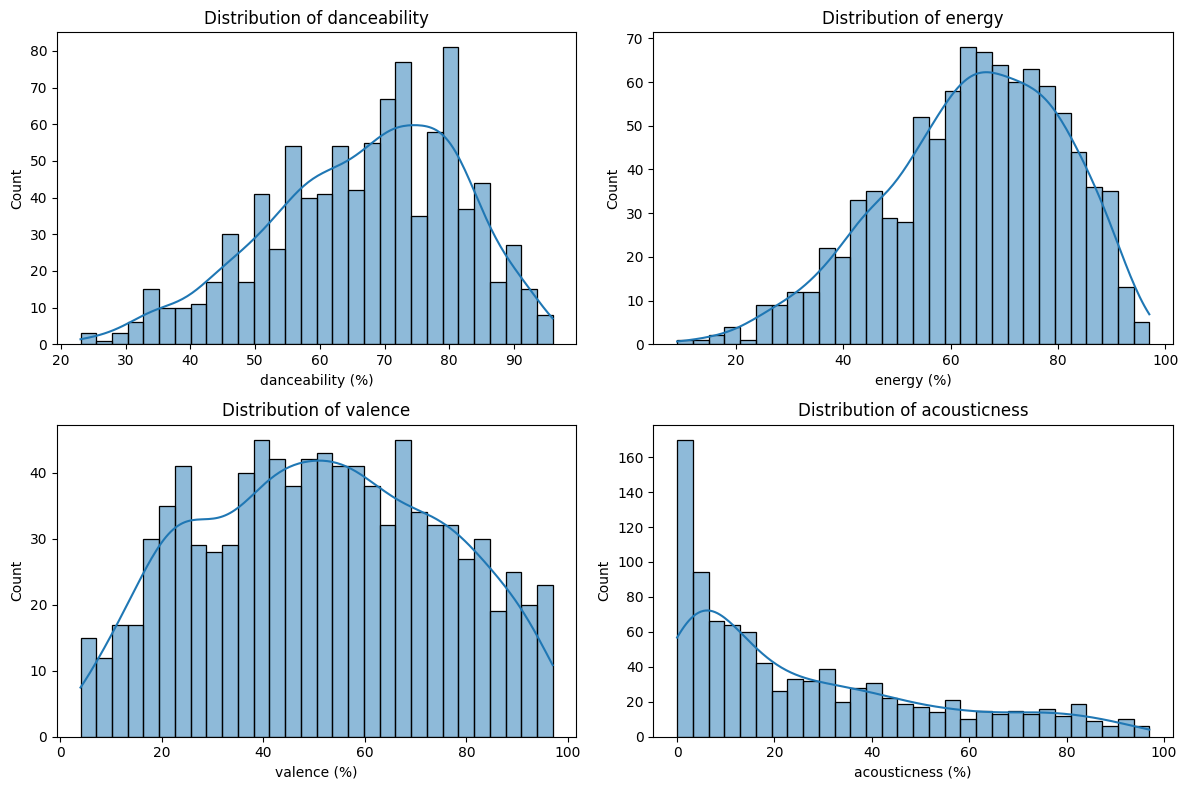

In [1158]:
features = [
    "danceability_%", 
    "energy_%", 
    "valence_%", 
    "acousticness_%"
]

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        df[feature],
        bins=30,
        kde=True
    )
    plt.title(f"Distribution of {feature.replace("_%", "")}")
    plt.xlabel(f"{feature.replace("_%", "")} (%)")
    plt.ylabel("Count")

plt.tight_layout()

filename = "figures/audio_feature_distributions.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")

plt.show()


#### Energy vs Danceability

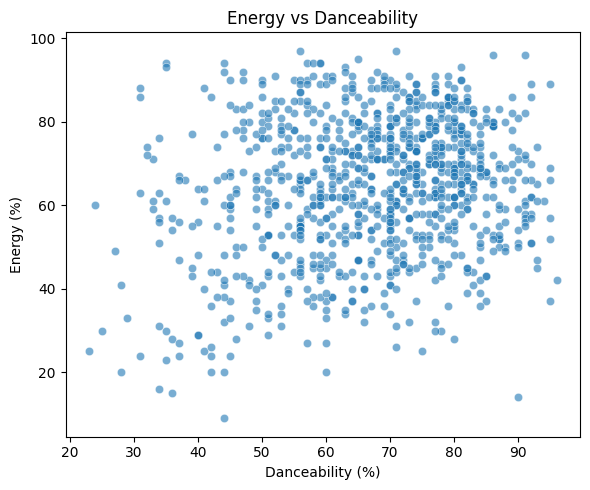

In [1159]:
title = "Energy vs Danceability"

plt.figure(figsize=(6, 5))

sns.scatterplot(
    data=df,
    x="danceability_%",
    y="energy_%",
    alpha=0.6
)

plt.xlabel("Danceability (%)")
plt.ylabel("Energy (%)")
plt.title(title)
plt.tight_layout()

filename = "figures/energy_vs_danceability.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")

plt.show()


#### 💾 Saving Plots

In [1160]:
source = "source: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023!\n"

with open("README.md", "w+") as readme:
    readme.write(source)

In [1161]:
all_plots = os.listdir("figures")
print(all_plots)

with open("README.md", "a") as readme:    
    for plot in all_plots:
        if plot.endswith(".png"):
            description = (
                plot
                .replace(".png", "")
                .replace("_", " ")
                .capitalize()
            )
            readme.write(f"\n{description}\n")

            new_line = f"![{plot.replace('.png', '')}](figures/{plot})\n"
            readme.write(new_line)


['2024-spotify-brand-assets-media-kit.jpg', 'audio_feature_distributions.png', 'correlation_of_streams_with_playlist_features.png', 'energy_vs_danceability.png', 'mean_streams_by_artist_count.png', 'number_of_tracks_in_charts_by_platform.png']
